# はじめに

`sensor_data/lidar_200.txt`を使って可視化などを行う。

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## データの読み込み

In [2]:
data = pd.read_csv("../sensor_data/sensor_data_200.txt",
                   delimiter=" ",
                   header=None,
                   names=["date", "time", "ir", "lidar"])
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


## ヒストグラムの描画

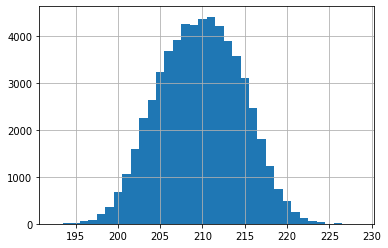

In [3]:
data["lidar"].hist(bins=max(data["lidar"]) - min(data["lidar"]),
                   align="left")
plt.show()

## 統計量の計算

平均・分散など

In [4]:
mean1 = sum(data["lidar"]) / len(data)
mean2 = data["lidar"].mean()

mean1, mean2

(209.73713297619855, 209.73713297619855)

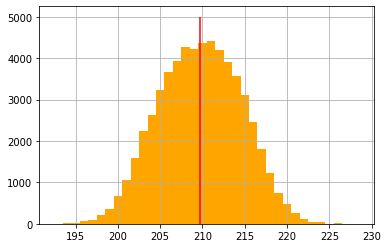

In [6]:
ax = data["lidar"].hist(bins=max(data["lidar"]) - min(data["lidar"]),
                        align="left", color="orange")
ax.vlines(mean1, ymin=0, ymax=5000, color="red")
plt.show()

標本分散と不偏分散の二つがある。

標本分散は

$$
    \sigma^2 = \frac{1}{N}\sum_{n=1}^N (z_n - \mu)^2
$$

不偏分散は

$$
    \sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (z_n - \mu)^2
$$

In [7]:
# 定義から計算
zs = data["lidar"].values
mean = sum(zs) / len(zs)
diff_square = (zs - mean) ** 2

# 標本分散
sampling_var = 1 / len(zs) * diff_square.sum()
# 不偏分散
unbiased_var = 1 / (len(zs) - 1) * diff_square.sum()

sampling_var, unbiased_var

(23.4077097702742, 23.408106598554504)

In [8]:
# pandasを利用
sampling_var = data["lidar"].var(ddof=False)
unbiased_var = data["lidar"].var()

sampling_var, unbiased_var

(23.4077097702742, 23.408106598554504)

In [12]:
# numpyを利用
sampling_var = np.var(zs, ddof=False)
unbiased_var = np.var(zs, ddof=True)

sampling_var, unbiased_var

(23.4077097702742, 23.408106598554504)

In [14]:
# 標準偏差
stddev1 = np.sqrt(sampling_var)
stddev2 = np.sqrt(unbiased_var)

stddev1, stddev2

(4.838151482774614, 4.838192492920729)

In [16]:
# pandasを利用
stddev = data["lidar"].std()
stddev

4.838192492920729

## 確率分布

In [19]:
freqs = data["lidar"].value_counts().to_frame("lidar")

In [21]:
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [22]:
freqs["probs"] = freqs["lidar"] / len(data)
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [23]:
sum(freqs["probs"])

1.0

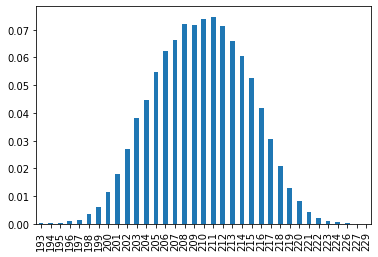

In [24]:
freqs["probs"].sort_index().plot.bar()
plt.show()

In [25]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0]

drawing()

207

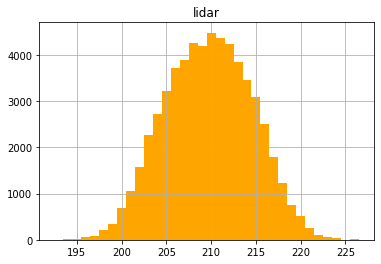

In [26]:
samples = [drawing() for i in range(len(data))]
simulated = pd.DataFrame(samples, columns=["lidar"])
simulated.hist(bins=simulated["lidar"].max() - simulated["lidar"].min(),
               align="left", color="orange")
plt.show()

ガウス分布の当てはめを行う

In [27]:
def p(z, mu=209.7, var=23.4):
    return np.exp(-(z - mu) ** 2 / (2 * var)) / np.sqrt(2 * np.pi * var)

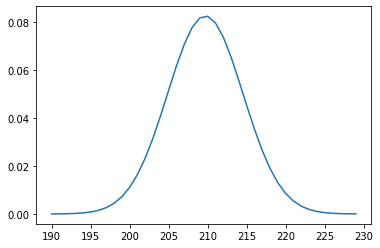

In [28]:
zs = range(190, 230)
ys = [p(z) for z in zs]

plt.plot(zs, ys)
plt.show()

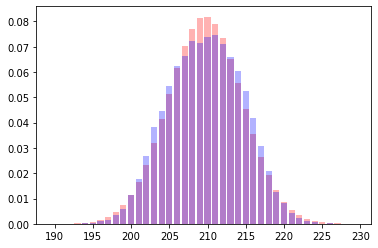

In [30]:
def probs(z, width=0.5):
    return width * (p(z - width) + p(z + width))


ys = [probs(z) for z in zs]
plt.bar(zs, ys, color="red", alpha=0.3)
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()

確率密度関数と累積分布関数

累積分布関数は

$$
    P(z < a) = \int_{-\infty}^a p(z)dz
$$

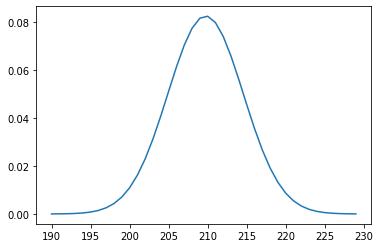

In [31]:
from scipy.stats import norm


zs = range(190, 230)
ys = [norm.pdf(z, mean1, stddev1) for z in zs]

plt.plot(zs, ys)
plt.show()

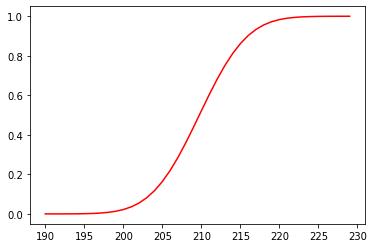

In [34]:
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs, ys, color="red")
plt.show()

$$
    \begin{align}
        P(a\le z < b) &= \int_a^b p(z)dz \\
                      &= \int_{-\infty}^b p(z)dz - \int_{-\infty}^a p(z)dz \\
                      &= P(z < b) - p(z < a)
    \end{align}
$$

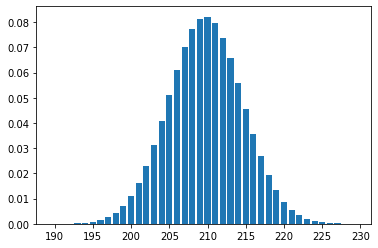

In [35]:
ys = [norm.cdf(z + 0.5, mean1, stddev1) - norm.cdf(z - 0.5, mean1, stddev1) for z in zs]
plt.bar(zs, ys)
plt.show()

## 期待値

期待値は離散の時

$$
    \sum_{z=-\infty}^{\infty}zP(z)
$$

連続の時

$$
    \int_{-\infty}^{\infty} zp(z) dz
$$

In [36]:
samples = [np.random.choice([1, 2, 3, 4, 5, 6]) for i in range(10000)]
sum(samples) / len(samples)

3.5178